# 경로 이동

In [ ]:
ls

 classification220718.zip  '소득 분류.ipynb'        test.csv
 data_description.txt       sample_submission.csv   train.csv


In [ ]:
%cd drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks/광주 인공지능 사관학교/케글 대회


In [ ]:
%cd 광주 인공지능 사관학교/케글 대회

[Errno 2] No such file or directory: '광주 인공지능 사관학교/케글 대회'
/content/drive/MyDrive/Colab Notebooks/광주 인공지능 사관학교/케글 대회


In [ ]:
ls

 classification220718.zip  '소득 분류.ipynb'        test.csv
 data_description.txt       sample_submission.csv   train.csv


# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
ls

 classification220718.zip  '소득 분류.ipynb'        test.csv
 data_description.txt       sample_submission.csv   train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

# 데이터 EDA

In [ ]:
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


﻿
no : 순서

age : 나이

workclass : 일 유형

fnlwgt : CPS(Current Population Survey) 가중치 : 최근 인구 조사

education : 교육수준

education.num : 교육수준 번호

marital.status : 결혼 상태

occupation : 직업

relationship : 가족관계

race : 인종

sex : 성별

capital.gain : 자본 이익

capital.loss : 자본 손실

hours.per.week : 주당 근무시간

native.country : 본 국적

target : 소득

0 = <=50K (5만 달러 이하)

1 = >50K (5만 달러 초과)

﻿

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


## 명목형 변수 추출

In [ ]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## train set 전처리

In [ ]:
normal = train[train.columns[-2]].dtype

nominal_form = []

for i in train.columns:
  if train[i].dtype == normal:
    nominal_form.append(i)

nominal_form

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

## 명목형 범주형으로 변환

In [ ]:
for i in nominal_form:
  s_k=LabelEncoder().fit(train[i])
  train[i] =s_k.transform(train[i])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             29305 non-null  int64
 1   workclass       29305 non-null  int64
 2   fnlwgt          29305 non-null  int64
 3   education       29305 non-null  int64
 4   education-num   29305 non-null  int64
 5   marital-status  29305 non-null  int64
 6   occupation      29305 non-null  int64
 7   relationship    29305 non-null  int64
 8   race            29305 non-null  int64
 9   sex             29305 non-null  int64
 10  capital-gain    29305 non-null  int64
 11  capital-loss    29305 non-null  int64
 12  hours-per-week  29305 non-null  int64
 13  native-country  29305 non-null  int64
 14  income          29305 non-null  int64
dtypes: int64(15)
memory usage: 3.4 MB


# test set 전처리

In [ ]:
test_ = test.drop(['no'], axis = 1)

In [ ]:
for i in nominal_form:
  s_k=LabelEncoder().fit(test_[i])
  test_[i] =s_k.transform(test_[i])

test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             19537 non-null  int64
 1   workclass       19537 non-null  int64
 2   fnlwgt          19537 non-null  int64
 3   education       19537 non-null  int64
 4   education-num   19537 non-null  int64
 5   marital-status  19537 non-null  int64
 6   occupation      19537 non-null  int64
 7   relationship    19537 non-null  int64
 8   race            19537 non-null  int64
 9   sex             19537 non-null  int64
 10  capital-gain    19537 non-null  int64
 11  capital-loss    19537 non-null  int64
 12  hours-per-week  19537 non-null  int64
 13  native-country  19537 non-null  int64
dtypes: int64(14)
memory usage: 2.1 MB


## 각 독립변수와 종속 변수 간 상관관계

In [ ]:
train.corr()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,1.000000,0.001111,0.001101,0.002347,-0.006186,-0.008466,0.005667,-0.009121,0.000714,0.002467,0.000594,0.003916,0.003246,0.003166,-0.001106,-0.004080
age,0.001111,1.000000,0.017302,-0.075753,-0.010707,0.035084,-0.258136,-0.017938,-0.263515,0.026360,0.083999,0.078498,0.054413,0.073100,-0.003506,0.238460
workclass,0.001101,0.017302,1.000000,-0.019199,0.015821,0.057548,-0.064475,0.255221,-0.098501,0.043100,0.095419,0.037689,0.002578,0.136815,-0.010012,0.047796
fnlwgt,0.002347,-0.075753,-0.019199,1.000000,-0.022574,-0.030600,0.028180,-0.004528,0.006756,-0.026042,0.029929,-0.005051,-0.001513,-0.010154,-0.053128,-0.002994
education,-0.006186,-0.010707,0.015821,-0.022574,1.000000,0.358224,-0.033034,-0.019543,-0.013271,0.008130,-0.024049,0.028027,0.021188,0.055359,0.065693,0.081312
education-num,-0.008466,0.035084,0.057548,-0.030600,0.358224,1.000000,-0.066478,0.110267,-0.096429,0.029572,0.017029,0.127651,0.083925,0.147569,0.057464,0.331798
marital-status,0.005667,-0.258136,-0.064475,0.028180,-0.033034,-0.066478,1.000000,-0.015346,0.187639,-0.067153,-0.128427,-0.044147,-0.027554,-0.186983,-0.021387,-0.198866
occupation,-0.009121,-0.017938,0.255221,-0.004528,-0.019543,0.110267,-0.015346,1.000000,-0.081857,0.008722,0.083736,0.026461,0.013131,0.075433,-0.012962,0.078490
relationship,0.000714,-0.263515,-0.098501,0.006756,-0.013271,-0.096429,0.187639,-0.081857,1.000000,-0.118671,-0.578295,-0.061873,-0.057646,-0.249984,-0.008758,-0.257709
race,0.002467,0.026360,0.043100,-0.026042,0.008130,0.029572,-0.067153,0.008722,-0.118671,1.000000,0.090411,0.010407,0.017811,0.041903,0.145420,0.075287


In [ ]:
train.corr().iloc[-1,:]

no               -0.004080
age               0.238460
workclass         0.047796
fnlwgt           -0.002994
education         0.081312
education-num     0.331798
marital-status   -0.198866
occupation        0.078490
relationship     -0.257709
race              0.075287
sex               0.215613
capital-gain      0.221387
capital-loss      0.135645
hours-per-week    0.231045
native-country    0.017058
income            1.000000
Name: income, dtype: float64

종속 변수와 상관성이 높은 변수

age: 0.238460

education-num 0.331798

sex 0.215613

capital-gain 0.221387

relationship     -0.257709

marital-status   -0.198866

In [ ]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
train[['education', 'education-num']]

,education,education-num
0,1,7
1,15,10
2,9,13
3,8,11
4,15,10
...,...,...
29300,11,9
29301,11,9
29302,0,6
29303,1,7


In [ ]:
train.drop(['no'], axis = 1, inplace = True)

# 종속변수, 독립변수 나누기

In [ ]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [ ]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
y

0        0
1        0
2        0
3        0
4        1
        ..
29300    0
29301    0
29302    0
29303    0
29304    0
Name: income, Length: 29305, dtype: int64

# train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,y)

# 모델 학습

## 의사결정 나무

In [ ]:
d_tree=DecisionTreeClassifier(random_state=42)
d_tree.fit(train_x,train_y)

DecisionTreeClassifier(random_state=42)

In [ ]:
d_tree.score(train_x,train_y),d_tree.score(test_x,test_y)

(0.9998634998634999, 0.8046949638324007)

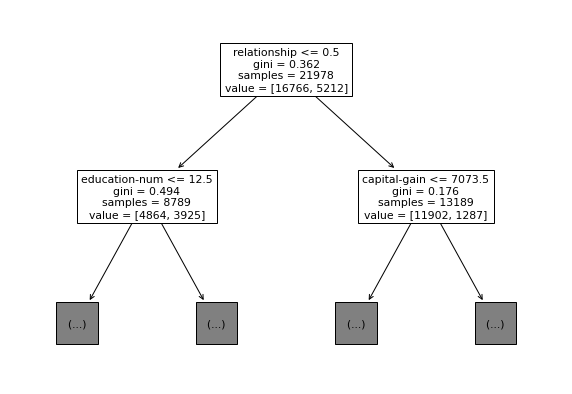

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(d_tree,max_depth=1,feature_names = X.columns)
plt.show()

In [ ]:
result = d_tree.predict(test_)

In [ ]:
result

array([0, 0, 1, ..., 0, 0, 1])

# 제출 형식 데이터로 변환

In [ ]:
no = [test['no'][i] for i in range(len(test))]
no

In [ ]:
df = pd.DataFrame(result,index = no, columns = ['income'])
df.reset_index(inplace = True)
df.columns = ['no','income']

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.columns = ['no','income']
df

,no,income
0,29306,0
1,29307,0
2,29308,1
3,29309,0
4,29310,1
...,...,...
19532,48838,0
19533,48839,0
19534,48840,0
19535,48841,0


In [ ]:
df.to_csv('result.csv', index = False)

과적합된 모델 -> 랜덤 포레스트

# 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

en = RandomForestClassifier(n_estimators=10, max_features = 2, oob_score = True)
cross_val_score(en, train_x,train_y, cv = 5).mean() #cv : 교차 검증 폴드 수

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

0.8462097925407418

In [ ]:
en.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_features=2, n_estimators=10, oob_score=True)

In [ ]:
en.score(train_x,train_y)

0.9878969878969879

In [ ]:
en_result = en.predict(test_)

In [ ]:
df = pd.DataFrame(en_result,index = no, columns = ['income'])
df.reset_index(inplace = True)
df.columns = ['no','income']

In [ ]:
df.to_csv('result_en.csv', index = False)

In [ ]:
en.fit(train_x,train_y)
result = en.predict(test)

In [ ]:
submit['income'] = result

교차 검증